# Option pricing with MC Simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyfeng as pf

In [2]:
sigma = 0.2
texp = 1
spot = 100
m_bs = pf.Bsm(sigma)

In [3]:
# Generate random numbers
z = np.random.normal(size=100000)
#anti-thetic

## Black-Scholes model (Geomegric Brownian Motion)

In [4]:
# Black-Scholes-Merton model (Geometric BM)
s_bsm = spot * np.exp(-(sigma**2)*texp/2 + sigma*np.sqrt(texp)*z)
print(s_bsm)

[112.71516114 118.95462822 106.75584326 ...  75.50308441  97.36473327
  72.78729042]


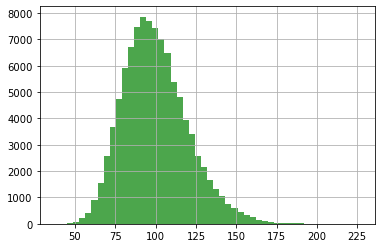

In [5]:
# the histogram of the data
n, bins, patches = plt.hist(s_bsm, 50, facecolor='green', alpha=0.7)
plt.grid(True)
plt.show()

In [6]:
### Price a call option

strike = 102
#cp_sign = 1
price = np.mean(np.fmax(s_bsm - strike, 0))
print( price )

7.073360771663503


In [7]:
# Exact price
m_bs.price(strike, spot, texp)

7.084494247829895

In [8]:
### Can price different options without extra computation

strike = 98
cp_sign = -1
price = np.mean(np.fmax(cp_sign*(s_bsm - strike), 0))
print( price )

6.929082051566798


In [9]:
# Exact price
m_bs.price(strike, spot, texp, cp=-1)

6.925974960378305

## Bachelier Model (Arithmetic Brownian Motion)

In [10]:
sigma = 20
texp = 1
spot = 100
m_norm = pf.Norm(sigma)

In [11]:
s_norm = spot + sigma * np.sqrt(texp) * z

In [12]:
strike = 102
cp_sign = 1
price = np.mean(np.fmax(s_norm - strike, 0))
print( price )

7.014846271552662


In [13]:
# Exact price
m_norm.price(strike, spot, texp)

7.018706624094294

In [14]:
strike = 98
cp_sign = -1
price = np.mean(np.fmax(cp_sign*(s_norm - strike), 0))
print( price )

7.0217770317607675


In [15]:
# Exact price
m_norm.price(strike, spot, texp, cp=-1)

7.018706624094294